## Assigment 2

## 1. Import Libraries

In [815]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

## Read File given a delimeter

In [841]:
def readFile(trainFile,seperator=","):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
#         data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

## Distance Measure

``` p=1 for manhattan```

```p=2 for Euclidean (default) ```

In [747]:
def distMeasure(dataset,testdataset,targetIndex,p):
    n=len(testdataset)
    dist=0
    for i in range(n):
        if i==targetIndex:continue
        dist+=math.pow(abs(dataset[i]-testdataset[i]),p);
    return math.pow(dist,1/p)

## Train Test split

In [159]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

## K nearest neighbour Algorithm

In [746]:
def KNNAlgo(train,testRecord,k,targetIndex,p):
    dists={}
    for trainRecord in train:
        dist=distMeasure(trainRecord,testRecord,targetIndex,p)
        dists[(str(trainRecord),trainRecord[targetIndex])]=dist
    sortedDict= sorted(dists.items(), key=operator.itemgetter(1))
    labelDict={}
    for i in range(k):
        if sortedDict[i][0][1] in labelDict.keys():
            labelDict[sortedDict[i][0][1]]+=1
        else:
            labelDict[sortedDict[i][0][1]]=1
    return max(labelDict.items(),key=operator.itemgetter(1))[0]
            

In [843]:
def predict(train,test,k,targetIndex,p):
    count=0
    for testRecord in test:
        predicted=KNNAlgo(train,testRecord,k,targetIndex,p)
        if testRecord[targetIndex]==predicted:
            count+=1
    accuracy=count*100/len(test)
#     print("Accuracy ", accuracy)
    return accuracy

In [802]:
def trainAndPredict(trainFile,percent,k,targetIndex,dataType,p=2):
    if dataType=="robot":
        data=readFile(trainFile," ")
        data=np.delete(data, 0, 1)
        data=np.delete(data, 7, 1)
        targetIndex=0
    elif dataType=="iris":
        data=readFile(trainFile)
    train,test=splitTrainTest(data,percent)
    return predict(train,test,k,targetIndex,p)

In [873]:
trainAndPredict("Robot1",80,7,1,"robot")

84.0

In [874]:
trainAndPredict("Iris.csv",80,7,4,"iris")

96.29629629629629

## "Accuracy" vs "K" graph KNN Algorithm

In [879]:
mpl.rcParams.update(mpl.rcParamsDefault)
def drawGraph(trainFile,percent,targetIndex,dataType,p=2):
    accuracyList1=[]
    accuracyList2=[]
    if dataType=="robot":
        for i in range(1,18,2):
            matrix1=trainAndPredict(trainFile,percent,i,targetIndex,"robot")
            matrix2=trainAndPredict(trainFile,percent,i,targetIndex,"robot",1)
            accuracyList1.append(matrix1)
            accuracyList2.append(matrix2)
    elif dataType=="iris":
        for i in range(1,18,2):
            matrix1=trainAndPredict(trainFile,percent,i,targetIndex,"iris")
            matrix2=trainAndPredict(trainFile,percent,i,targetIndex,"iris",1)
            accuracyList1.append(matrix1)
            accuracyList2.append(matrix2)
    else:
        print("Invalid data type : expected iris or robot")
        return
    
    plt.xlabel("number of neighbours (K)")
    plt.ylabel("Accuracy (in percent)")
    plt.plot(range(1,18,2), accuracyList1,color="orange", linewidth=2.5, label="Euclidean")
    plt.plot(range(1,18,2), accuracyList2,color="green", linewidth=2.5, label="Manhattan")
    plt.legend()
    plt.grid(True)
    plt.show()
    

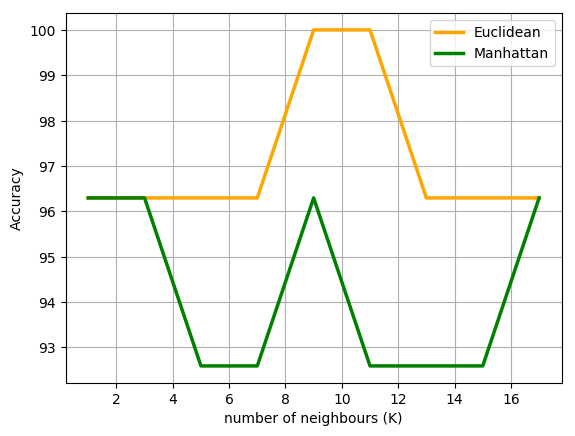

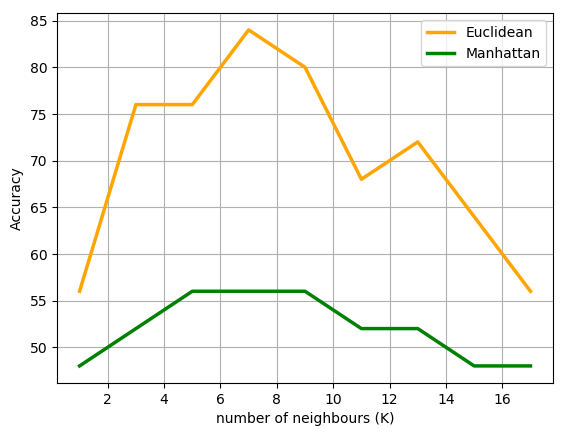

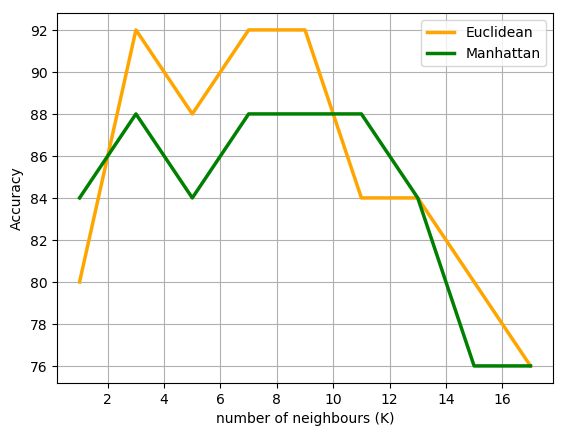

In [878]:
drawGraph("Iris.csv",80,4,"iris")
drawGraph("Robot1",80,1,"robot")
drawGraph("Robot2",80,1,"robot")

## Comparision with scikit learn

In [772]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix  

def skLearn(trainFile,trainDataPercent,delimeter,unwantedCols,NANCols,targetIndex,avg=None):
    if trainDataPercent==100:
        print("No Validation data (Training percent should be less than 100)")
        return
    data=readFile(trainFile,delimeter)
#     data=data.sample(frac=1)
    
    le = LabelEncoder()
    X=None
    
    for i in NANCols:
        data[:,i]=le.fit_transform(data[:,i])

        Y=data[:,targetIndex]
    Y=Y.astype('int')
    X=np.delete(data,unwantedCols,axis=1)
    trainX,testX,trainY,testY=train_test_split(X,Y,test_size=(100-trainDataPercent)/100,shuffle=False)
    #specify p=1,2,3
    tree = KNeighborsClassifier(n_neighbors=7)      
    tree.fit(trainX, trainY)  
    y_pred = tree.predict(testX)  
    matrix=precision_recall_fscore_support(testY,y_pred,average=avg)
    confMat=confusion_matrix(testY,y_pred)
    print(matrix)
    print("=======================================================")
    print(confMat)
    print(accuracy_score(testY,y_pred))
    print(classification_report(testY, y_pred))
#     print("=======================================================")
#     print("Scikit Learn Results ")
#     print("Trained on %d percent of Training data " %(trainDataPercent))
#     print("Total DataSets: ",len(data))
#     print("Training DataSets: ",int(len(data)*(trainDataPercent/100)+0.5))
#     print("Validation DataSets: ",int(len(data)*(1-trainDataPercent/100)+0.5))
#     print("Truelly Validated: ",confMat[0][0]+confMat[1][1])
#     print("Falsely Validated: ",confMat[0][1]+confMat[1][0])
#     print("=======================================================")
#     print("Accuracy = ", accuracy_score(testY,y_pred))
#     print("Precision = ", matrix[0])
#     print("Recall = ", matrix[1])
#     print("F1-Score = ", matrix[2])

In [775]:
skLearn("Iris.csv",80,",",[4],[4],4)
skLearn("Robot2",80," ",[0,1,8],[],1,"binary")

(array([1.        , 1.        , 0.85714286]), array([1. , 0.9, 1. ]), array([1.        , 0.94736842, 0.92307692]), array([11, 10,  6], dtype=int32))
[[11  0  0]
 [ 0  9  1]
 [ 0  0  6]]
0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6

   micro avg       0.96      0.96      0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

(1.0, 0.8181818181818182, 0.9, None)
[[14  0]
 [ 2  9]]
0.92
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.82      0.90        11

   micro avg       0.92      0.92      0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25

